<a href="https://colab.research.google.com/github/nguyenngocbinh/QAI/blob/master/How_to_Improve_an_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is How to Improve an Imbalanced Dataset
-------------------------

When working with data in the real world, the issue of an imbalanced dataset comes up more often than you may think. An imbalanced dataset is when the data has significantly less data in a class, relative to the other classes present. For example, a dataset which is used for predicting diabetes, it wouldn't be rare to find 2 times more records of patients without diabetes than patients with diabetes. Why is this a problem? It's a problem because, in the example mentioned, our model can easily achieve 66% accuracy by always predicting the patient to not have diabetes. Yes, 66% accuracy isn't good, but because it's better than random (i.e., 50% in this case), it gives us this false sense that our model is actually learning something valuable, when in fact, it just learned to always predict the same thing.

Let's take a look at an example of an imbalanced dataset. For our example, we'll be using the Pima Indians Diabetes dataset. We're going to be re-running the code from our [last article which introduced PyTorch's DataLoader](https://cutt.ly/cg2ai-pytorch-dataloader-medium). In this article, I'll use the headings to describe the reused code, but if you want further explanation on it, then please refer to the article on [PyTorch's DataLoader](https://cutt.ly/cg2ai-pytorch-dataloader-medium).

### Import relevant libraries

In [1]:
import pandas as pd
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

### Read, split and scale data

In [2]:
!wget --header="Host: p8vwkq.dm.files.1drv.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,ko;q=0.4" --header="Referer: https://onedrive.live.com/" "https://p8vwkq.dm.files.1drv.com/y4m47W-CG8J1VqKkT9U5ICRkmA3_qmEPp9NNZsubE7sP1xLr5oCugYjN8z_QDcgNeDgRbKCpyq02HmOdhkM-l5agVJt5SdHrDW0ArThcqCrVtC34vwNIqPZ7rieqcQxVxMghXPDo8aU3raKv2u9knOrom6f-slocGiFiArvYQ1Gpb1e9aX6b902bjQlu88wYwKO4xiHiaBOJgHOkdPQGYc2AQ" -c -O 'creditcard.csv'

--2022-07-09 07:45:51--  https://p8vwkq.dm.files.1drv.com/y4m47W-CG8J1VqKkT9U5ICRkmA3_qmEPp9NNZsubE7sP1xLr5oCugYjN8z_QDcgNeDgRbKCpyq02HmOdhkM-l5agVJt5SdHrDW0ArThcqCrVtC34vwNIqPZ7rieqcQxVxMghXPDo8aU3raKv2u9knOrom6f-slocGiFiArvYQ1Gpb1e9aX6b902bjQlu88wYwKO4xiHiaBOJgHOkdPQGYc2AQ
Resolving p8vwkq.dm.files.1drv.com (p8vwkq.dm.files.1drv.com)... 13.107.42.12
Connecting to p8vwkq.dm.files.1drv.com (p8vwkq.dm.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [application/octet-stream]
Saving to: ‘creditcard.csv’

creditcard.csv      100%[===================>] 143.84M  24.8MB/s    in 5.9s    

2022-07-09 07:45:58 (24.2 MB/s) - ‘creditcard.csv’ saved [150828752/150828752]



In [3]:
df = pd.read_csv(r'creditcard.csv')
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:

# TODO
X = # remove label column
y = # get label column
X = X.values
y = torch.tensor(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = torch.tensor(scaler.transform(X_train))
X_test = # transform test set
df.shape

In [ ]:
print(f"Number data point in Train set: {len(X_train)}")
print(f"Number data point in Test set: {len(X_test)}")

Number data point in Train set: 190820
Number data point in Test set: 93987


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round((len(X_train) - np.count_nonzero(y_train))/len(X_train) * 100,2), '% of the Train dataset')
print('Frauds', round(np.count_nonzero(y_train)/len(X_train) * 100,2), '% of the Train dataset')

No Frauds 99.82 % of the Train dataset
Frauds 0.18 % of the Train dataset


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round((len(X_test) - np.count_nonzero(y_test))/len(X_test) * 100,2), '% of the test dataset')
print('Frauds', round(np.count_nonzero(y_test)/len(X_test) * 100,2), '% of the test dataset')

No Frauds 99.84 % of the test dataset
Frauds 0.16 % of the test dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

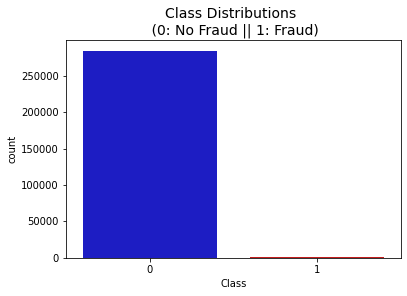

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


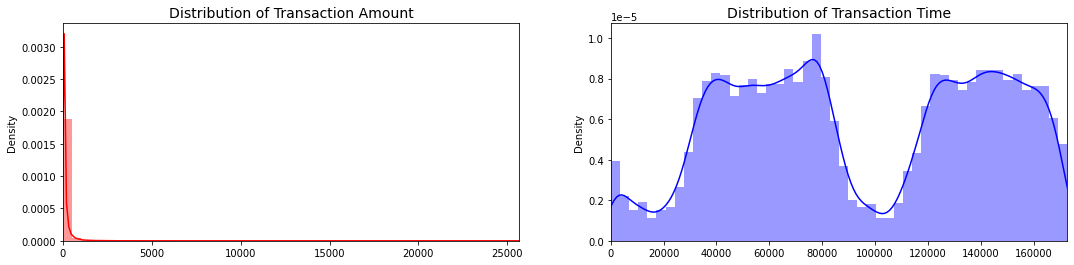

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Create our own class which inherits from PyTorch's Dataset class

In [ ]:
class Fraud(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.len = len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

### Create variables for our train and test data using our custom class above

In [ ]:
train_data = Fraud(X_train, y_train)
test_data = Fraud(X_test, y_test)

### Create reusable function and variables

In [ ]:
def accuracy(y_pred, y):
    return torch.sum((((y_pred>=0.5)+0).reshape(1,-1)==y)+0).item()/y.shape[0]

### Take advantage of PyTorch's DataLoader class

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

### Create the architecture for our neural network

In [ ]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        # TODO insert hidden layer 1
        self.hidden_linear = nn.Linear(30, 16)
        self.hidden_linear1 = 
        self.output_linear = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        # forward part
        X = self.hidden_linear(X)
        X = 
        hidden_output = self.sigmoid(X)
        output = self.sigmoid(self.output_linear(hidden_output))
        return output

### Instantiate our Model class and set our loss and optimizer

In [ ]:
epochs = 10+1
print_epoch = 1
lr = 1e-2
batch_size = 64

model = Model()
BCE = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

### Train our model

In [ ]:
test_result = [] 

for epoch in range(epochs):
    
    iteration_loss = 0.
    iteration_accuracy = 0.
    
    model.train()
    for i, data in enumerate(train_loader):
      X, y = data
      X = X.float()
      y_pred = # forward X through model
      loss = BCE(y_pred, y.reshape(-1,1).float())     
      
      iteration_loss += loss
      iteration_accuracy += # caculate accuracy

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        

    if(epoch % print_epoch == 0):
        print('Train: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))    

    iteration_loss = 0.
    iteration_accuracy = 0.    

    model.eval()
    for i, data in enumerate(test_loader):
      X, y = data
      X = X.float()
      y_pred = #forward X through model
      loss = BCE(y_pred, y.reshape(-1,1).float())

      iteration_loss += loss
      iteration_accuracy += # caculate accuracy

      if(epoch == epochs-1):
        test_result.append((y, ((y_pred>=0.5)+0).reshape(1,-1)[0]))

    if(epoch % print_epoch == 0):
        print('Test: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train: epoch: 0 - loss: 0.06165; acc: 0.998
Test: epoch: 0 - loss: 0.01930; acc: 0.998
Train: epoch: 1 - loss: 0.01556; acc: 0.998
Test: epoch: 1 - loss: 0.01191; acc: 0.998
Train: epoch: 2 - loss: 0.01140; acc: 0.998
Test: epoch: 2 - loss: 0.00955; acc: 0.998
Train: epoch: 3 - loss: 0.00977; acc: 0.998
Test: epoch: 3 - loss: 0.00841; acc: 0.998
Train: epoch: 4 - loss: 0.00890; acc: 0.998
Test: epoch: 4 - loss: 0.00775; acc: 0.998
Train: epoch: 5 - loss: 0.00834; acc: 0.998
Test: epoch: 5 - loss: 0.00731; acc: 0.998
Train: epoch: 6 - loss: 0.00801; acc: 0.998
Test: epoch: 6 - loss: 0.00701; acc: 0.998
Train: epoch: 7 - loss: 0.00774; acc: 0.998
Test: epoch: 7 - loss: 0.00677; acc: 0.998
Train: epoch: 8 - loss: 0.00753; acc: 0.998
Test: epoch: 8 - loss: 0.00659; acc: 0.998
Train: epoch: 9 - loss: 0.00736; acc: 0.998
Test: epoch: 9 - loss: 0.00644; acc: 0.998
Train: epoch: 10 - loss: 0.00722; acc: 0.998
Test: epoch: 10 - loss: 0.00631; acc: 0.998


Considering our very simple architecture and the fact that we're not doing much else with the data, our loss and accuracy are decent (the values might vary a bit if you rerun it), so what's the problem? The problem comes when we take a closer look into our results for our test set.

## Dissecting Our Results with a Confusion Matrix
To dissect our test results, we're going to use something called a confusion matrix. If you look at the code above, you'll see in the testing portion I added an if statement which, at the last epoch, appends our test results to a list. We'll use the confusion_matrix and ConfusionMatrixDisplay functions built-in to sklearn to accomplish the task of producing a confusion matrix.

First, let's import the functions.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Next, we're going to have to unzip the list and make sure that the actuals (i.e., ground truth) are together in 1 list and the predictions are in another list.

In [ ]:
true, pred = zip(*test_result)
true, pred = torch.cat(true), torch.cat(pred)

Lastly, we'll create our confusion matrix using the confusion_matrix function. It takes our actual values, our predicted values, and a label. This label is what the distinct labels of the values should be. In our case we have 0 for the negative case (i.e., patients who don't have diabetes) and 1 for the positive case (i.e., patients that have diabetes).

To pretty-up our confusion matrix, we'll use the ConfusionMatrixDisplay, passing in our confusion matrix along with the labels. Thereafter, we'll plot it by calling its plot function.

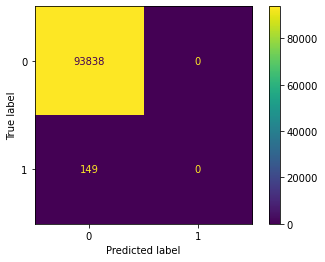

In [ ]:
cm = confusion_matrix(true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

There we have it - a pretty confusion matrix. The question is, how do we read this? On the left, we have the true labels and at the bottom, we have the predicted labels. We can see that for 168 records which are class 0, our model predicted 133 of them to be 0 (correctly classified) and 35 of them to be 1 (misclassified). As for the records which are class 1, of the 86 records, our model predicted 31 of them to be 0 (misclassified) and 55 of them to be 1 (correctly classified).

In terms of accuracy, let's see how our model performed across the 2 classes (i.e., 0 and 1).

In [ ]:
print('class 0 accuracy: {0:.3f}'.format(cm[0,0]/sum(cm[0])))
print('class 1 accuracy: {0:.3f}'.format(cm[1,1]/sum(cm[1])))

class 0 accuracy: 1.000
class 1 accuracy: 0.000


That's interesting. We're seeing that our model performs significantly better on class 0 than on class 1. Essentially, the accuracy we were seeing after training our model is not a true representation of what we're seeing when we split up our classes. Class 1 performs significantly worse than what we were hoping for.

## Attempting to Balance an Imbalanced Dataset
Above, we saw that our model results were not exactly being represented when we took a further look at our test results separated by class. Why? What's the reason that our model was able to predict class 0 better than class 1? The answer is simple. If we look at our training data, we'll most likely see that we actually have significantly more data for the class 0 than we do for class 1.

Let's take a look at the training set to see if our assumption is valid.

In [ ]:
print('amount of records for class 0: {0:.0f}'.format(torch.sum((y_train==0)*1).item()))
print('amount of records for class 1: {0:.0f}'.format(torch.sum((y_train==1)*1).item()))

amount of records for class 0: 332
amount of records for class 1: 182


As we assumed, the classes are highly imbalanced. The amount of training data for class 1 is almost half that of class 0.

How do we fix this problem? Balancing an imbalanced class can be done in several ways, but in this article, we're going to be discussing a method which was [mentioned by Jeremy Howard (the founder of FastAI)]( https://twitter.com/jeremyphoward/status/1175177461920698368?lang=en). In his post, he indirectly refers to the paper [A systematic study of the class imbalance problem in convolutional neural networks](https://arxiv.org/abs/1710.05381). The method which the research paper mentions to have performed the best is that of oversampling. Although the paper discusses oversampling for convolution neural networks, in practice, it works just as well in other types of neural networks. The question you’re probably asking now is, “what’s oversampling?” Oversampling is a fancy way to say duplication of data. The data is oversampled by taking a random sample of the already existing data and duplicating it. After duplicating the random sample, it’s then appended to the training set. Something to keep in mind is that oversampling is only done on the training data and not the testing data. The best way to ensure this, is to first split the training and testing data, and then oversample only the training data.

The steps we'll use to accomplish the task of oversampling is by first splitting our dataset into training and testing sets, and then oversampling the imbalanced class (i.e., class 1) in the training set until it has the same number of records as the other class.

Let's see how we would execute this in code.

#### Under-Sampling

In [ ]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

Time        V1        V2        V3        V4        V5        V6  \
243633  152010.0  2.150982 -0.825264 -1.159991 -0.089468 -0.832194 -1.030525   
183106  125658.0  0.224414  2.994499 -3.432458  3.986519  3.760233  0.165640   
931        705.0  1.205846  0.172720 -0.643274  1.514712  2.162044  4.067599   
154960  103808.0 -4.517344  2.500224 -4.013928  1.189452 -2.486861 -1.413476   
125342   77627.0 -7.139060  2.773082 -6.757845  4.446456 -5.464428 -1.713401   

              V7        V8        V9  ...       V21       V22       V23  \
243633 -0.418428 -0.246889  0.008618  ... -0.248701 -0.016776  0.097160   
183106  1.099378 -0.654557 -2.435416  ...  0.491337 -0.984223 -0.421979   
931    -0.620643  0.997023 -0.410812  ... -0.342351 -1.032514  0.048986   
154960 -4.245707  1.265087  1.168828  ...  1.326944  0.102999  0.508167   
125342 -6.485365  3.409395 -3.053493  ...  1.303250 -0.016118 -0.876670   

             V24       V25       V26       V27       V28  Amount  Class  
243633  0.052969  0.038849  0.729145 -0.053434 -0.069021   11.50      0  
183106 -1.048058  0.726412  0.268625  0.283689  0.419102    0.00      1  
931     0.971533  0.534093 -0.164691  0.010943  0.020109    6.55      0  
154960 -0.278018  0.139721  0.064610 -0.972358  0.351360    2.27      1  
125342  0.382230 -1.054624 -0.614606 -0.766848  0.409424  106.90      1  

[5 rows x 31 columns]

In [ ]:
X = new_df[new_df.columns[:-1]]
y = new_df['Class']
X = X.values
y = torch.tensor(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = torch.tensor(scaler.transform(X_train))
X_test = torch.tensor(scaler.transform(X_test))
new_df.shape

(984, 31)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

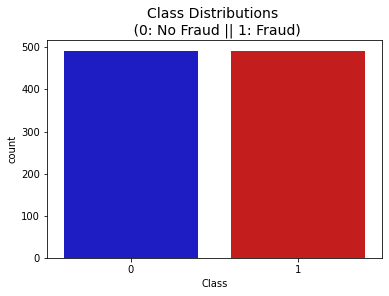

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Before we continue with the topic of oversampling, you probably realized the stratify parameter in the train_test_split function. The stratify parameter allows our test data to be representative of our training data, in terms of its balance. What does that mean? It means that our test data has the same ratio of class 0 and class 1 which exists in our training data. We passed it our target (i.e., y) to let it know that our data should be stratified in accordance with that feature. Stratifying our data should help us a bit, especially considering that our dataset is not only imbalanced, but it's also small.

Back to the topic at hand, as you can see, the oversampling was performed by finding the difference in size between class 0 and class 1 and then choosing a random set of indices for class 1, duplicating the random set of data and then appending it to the training set.

Now that we've oversampled from class 1 (i.e., the imbalanced class), we should now have the same amount of data in both classes. Let's see if they're the same size.

In [ ]:
print('amount of records for class 0: {0:.0f}'.format(torch.sum((y_train==0)*1).item()))
print('amount of records for class 1: {0:.0f}'.format(torch.sum((y_train==1)*1).item()))

amount of records for class 0: 344
amount of records for class 1: 315


Awesome. We got that to work.

Now that we've balanced our dataset, let's throw it into PyTorch's DataLoader.

In [ ]:
train_data = Fraud(X_train, y_train)
test_data = Fraud(X_test, y_test)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

We'll also reset our model, making sure that we're not reusing our already train model.

In [ ]:
model = Model()
BCE = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

## Training Our Model on Our New Dataset

Finally, we're ready to train our model on our new (and hopefully improved) dataset. Let's see how it performs.

In [ ]:
test_result = [] 
epochs = 1000+1
print_epoch = 100
lr = 1e-2
batch_size = 64
for epoch in range(epochs):
    
    iteration_loss = 0.
    iteration_accuracy = 0.
    
    model.train()
    for i, data in enumerate(train_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())     
      
      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        

    if(epoch % print_epoch == 0):
        print('Train: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))    

    iteration_loss = 0.
    iteration_accuracy = 0.    

    model.eval()
    for i, data in enumerate(test_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())

      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      if(epoch == epochs-1):
        test_result.append((y, ((y_pred>=0.5)+0).reshape(1,-1)[0]))

    if(epoch % print_epoch == 0):
        print('Test: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train: epoch: 0 - loss: 0.36911; acc: 0.911
Test: epoch: 0 - loss: 0.45640; acc: 0.804
Train: epoch: 100 - loss: 0.25643; acc: 0.922
Test: epoch: 100 - loss: 0.29356; acc: 0.904
Train: epoch: 200 - loss: 0.20419; acc: 0.942
Test: epoch: 200 - loss: 0.22037; acc: 0.917
Train: epoch: 300 - loss: 0.16386; acc: 0.955
Test: epoch: 300 - loss: 0.25765; acc: 0.902
Train: epoch: 400 - loss: 0.14552; acc: 0.958
Test: epoch: 400 - loss: 0.22910; acc: 0.907
Train: epoch: 500 - loss: 0.13160; acc: 0.963
Test: epoch: 500 - loss: 0.17309; acc: 0.940
Train: epoch: 600 - loss: 0.12265; acc: 0.961
Test: epoch: 600 - loss: 0.16820; acc: 0.938
Train: epoch: 700 - loss: 0.11759; acc: 0.961
Test: epoch: 700 - loss: 0.19356; acc: 0.902
Train: epoch: 800 - loss: 0.10984; acc: 0.966
Test: epoch: 800 - loss: 0.17430; acc: 0.930
Train: epoch: 900 - loss: 0.11093; acc: 0.967
Test: epoch: 900 - loss: 0.16719; acc: 0.932
Train: epoch: 1000 - loss: 0.10520; acc: 0.967
Test: epoch: 1000 - loss: 0.16898; acc: 0.935


Before even dissecting our results, we're already seeing that there's more of a consistency between the train and test results. That's a good sign. If you rerun it, your results may vary, but it won't vary in its consistency between the train and test set.

Let's unzip our results from our last epoch and dissect them using a confusion matrix.

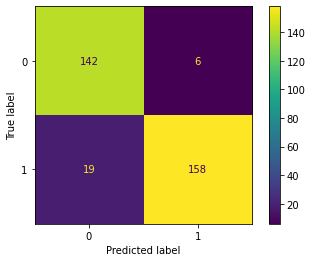

In [ ]:
true, pred = zip(*test_result)
true, pred = torch.cat(true), torch.cat(pred)

cm = confusion_matrix(true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

Having stratified our data, we see that class 1 has a little bit more data, but as we said above, the test set has the same balance as the training set.

As we can see from the confusion matrix, our class which wasn't oversampled is performing the same as before, which is good. Throwing more data of the positive class (i.e., class 1) didn't affect our model in its ability to comprehend the negative class (i.e., class 0). As for our class which was oversampled, I'm not really good at looking at numbers like that and making conclusions from it, so let's look at it in terms of accuracy.

In [ ]:
print('class 0 accuracy: {0:.3f}'.format(cm[0,0]/sum(cm[0])))
print('class 1 accuracy: {0:.3f}'.format(cm[1,1]/sum(cm[1])))

class 0 accuracy: 0.959
class 1 accuracy: 0.893


## Oversampling using SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
df = pd.read_csv(r'creditcard.csv')
df.head()

X = df[df.columns[:-1]]
y = df['Class']
X = X.values
y = torch.tensor(y.values)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = torch.tensor(scaler.transform(X_train))
X_test = torch.tensor(scaler.transform(X_test))

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round((len(y) - np.count_nonzero(y))/len(y) * 100,2), '% of the Train dataset')
print('Frauds', round(np.count_nonzero(y)/len(y) * 100,2), '% of the Train dataset')

No Frauds 50.0 % of the Train dataset
Frauds 50.0 % of the Train dataset


In [ ]:
train_data = Fraud(X_train, y_train)
test_data = Fraud(X_test, y_test)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [ ]:
model = Model()
BCE = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [ ]:
test_result = [] 
epochs = 10+1
print_epoch = 1
batch_size = 64
for epoch in range(epochs):
    
    iteration_loss = 0.
    iteration_accuracy = 0.
    
    model.train()
    for i, data in enumerate(train_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())     
      
      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        

    if(epoch % print_epoch == 0):
        print('Train: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))    

    iteration_loss = 0.
    iteration_accuracy = 0.    

    model.eval()
    for i, data in enumerate(test_loader):
      X, y = data
      y_pred = model(X.float())
      loss = BCE(y_pred, y.reshape(-1,1).float())

      iteration_loss += loss
      iteration_accuracy += accuracy(y_pred, y)

      if(epoch == epochs-1):
        test_result.append((y, ((y_pred>=0.5)+0).reshape(1,-1)[0]))

    if(epoch % print_epoch == 0):
        print('Test: epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, iteration_loss/(i+1), iteration_accuracy/(i+1)))

Train: epoch: 0 - loss: 0.25809; acc: 0.923
Test: epoch: 0 - loss: 0.11560; acc: 0.966
Train: epoch: 1 - loss: 0.09684; acc: 0.970
Test: epoch: 1 - loss: 0.08743; acc: 0.972
Train: epoch: 2 - loss: 0.08098; acc: 0.974
Test: epoch: 2 - loss: 0.07801; acc: 0.974
Train: epoch: 3 - loss: 0.07368; acc: 0.976
Test: epoch: 3 - loss: 0.07243; acc: 0.976
Train: epoch: 4 - loss: 0.06902; acc: 0.977
Test: epoch: 4 - loss: 0.06859; acc: 0.977
Train: epoch: 5 - loss: 0.06572; acc: 0.978
Test: epoch: 5 - loss: 0.06610; acc: 0.978
Train: epoch: 6 - loss: 0.06324; acc: 0.979
Test: epoch: 6 - loss: 0.06373; acc: 0.978
Train: epoch: 7 - loss: 0.06134; acc: 0.979
Test: epoch: 7 - loss: 0.06203; acc: 0.979
Train: epoch: 8 - loss: 0.05984; acc: 0.980
Test: epoch: 8 - loss: 0.06029; acc: 0.980
Train: epoch: 9 - loss: 0.05860; acc: 0.980
Test: epoch: 9 - loss: 0.05950; acc: 0.980
Train: epoch: 10 - loss: 0.05756; acc: 0.980
Test: epoch: 10 - loss: 0.05857; acc: 0.980


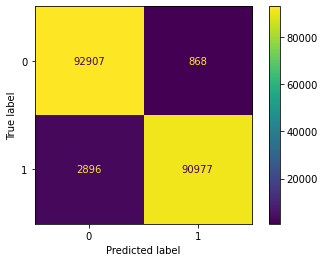

In [ ]:
true, pred = zip(*test_result)
true, pred = torch.cat(true), torch.cat(pred)

cm = confusion_matrix(true, pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [ ]:
print('class 0 accuracy: {0:.3f}'.format(cm[0,0]/sum(cm[0])))
print('class 1 accuracy: {0:.3f}'.format(cm[1,1]/sum(cm[1])))

class 0 accuracy: 0.991
class 1 accuracy: 0.969
